In [1]:
# Import libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import ssl

In [2]:
#Assign the website url to attribute
url = "https://www.calculator.net/currency-calculator.html"

In [4]:
#Open the webpage
context = ssl.SSLContext()
page = urlopen(url, context=context)
page
#Read the webpage
html_bytes = page.read()
html = html_bytes.decode("utf-8")
# Read the url using Beautiful Soup and print to inspect the html structure
soup=BeautifulSoup(html)
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Currency Calculator
  </title>
  <meta content="Free currency calculator to convert between most of the global currencies using live or custom exchange rates. Also, check the latest exchange rate." name="description"/>
  <link href="/style.css" rel="stylesheet"/>
  <script async="" src="//d26tpo4cm8sb6k.cloudfront.net/js/common.js">
  </script>
  <link href="//d26tpo4cm8sb6k.cloudfront.net/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="//d26tpo4cm8sb6k.cloudfront.net/icon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="//d26tpo4cm8sb6k.cloudfront.net/icon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="/manifest.json" rel="manifest"/>
 </head>
 <body>
  <div id="headerout">
   <div id="header">
    <div id="logo">
     <a href="/">
      <img height="22" src="//d26tpo4cm8sb6k.cloudfront.net/img/svg/calculator-white.svg" width="208"/>
     </a>
    </div>
   </di

In [42]:
# The required data is available within the tag script. 
import re
arr = soup.find_all('script')[2].get_text() #Extract the tag script
arr
start = arr.find("listsArrayData = [") + len("listsArrayData = [") # Identify the starting position
end = arr.find("];var majorCurrenciesIndex") # Identify the end position
substring = arr[start:end] # Extract the data in between
print(substring) # Print the extracted data

["AED",3.673],["AFN",85.999998],["ALL",114.25],["AMD",457.047903],["ANG",1.802095],["AOA",405.654],["ARS",116.325896],["AUD",1.414517],["AWG",1.7955],["AZN",1.7],["BAM",1.84683],["BBD",2],["BDT",86.438014],["BGN",1.8489],["BHD",0.37702],["BIF",2022.5],["BMD",1],["BND",1.383818],["BOB",6.874475],["BRL",5.0974],["BSD",1],["BTC",0.000028086684],["BTN",76.738504],["BWP",12.164515],["BYN",3.374252],["BZD",2.015467],["CAD",1.28951],["CDF",2019],["CHF",0.988356],["CLF",0.031205],["CLP",861.04],["CNH",6.710703],["CNY",6.6717],["COP",4093.705751],["CRC",664.167708],["CUC",1],["CUP",25.75],["CVE",105.33],["CZK",23.541757],["DJF",178.008402],["DKK",7.036314],["DOP",55.2],["DZD",144.98],["EGP",18.4851],["ERN",15.000001],["ETB",51.42],["EUR",0.945773],["FJD",2.16645],["FKP",0.81143],["GBP",0.81143],["GEL",3.03],["GGP",0.81143],["GHS",7.5],["GIP",0.81143],["GMD",53.775],["GNF",8853.166047],["GTQ",7.666928],["GYD",209.265432],["HKD",7.84944],["HNL",24.459999],["HRK",7.124],["HTG",109.991589],["HUF",3

In [43]:
# splitting using split()
delim = "],"
temp = substring.split(delim) # 
df = pd.DataFrame (temp, columns = ['col']) # Convert the data into a dataframe
df

,col
0,"[""AED"",3.673"
1,"[""AFN"",85.999998"
2,"[""ALL"",114.25"
3,"[""AMD"",457.047903"
4,"[""ANG"",1.802095"
...,...
164,"[""XPT"",0.00103521"
165,"[""YER"",250.249937"
166,"[""ZAR"",15.993903"
167,"[""ZMW"",16.998329"


In [44]:
# Split the dataframe field into multiple fields 
delimiter= ','
ForexRate= df['col'].str.split(delimiter, expand=True)
ForexRate.columns =['Currency', 'ExchangeRate']  # Assign column headers
ForexRate

,Currency,ExchangeRate
0,"[""AED""",3.673
1,"[""AFN""",85.999998
2,"[""ALL""",114.25
3,"[""AMD""",457.047903
4,"[""ANG""",1.802095
...,...,...
164,"[""XPT""",0.00103521
165,"[""YER""",250.249937
166,"[""ZAR""",15.993903
167,"[""ZMW""",16.998329


In [45]:
# Remove the special characters
ForexRate.Currency=ForexRate.Currency.str.replace('[','') 
ForexRate.Currency=ForexRate.Currency.str.replace('"','')
ForexRate.ExchangeRate=ForexRate.ExchangeRate.str.replace(']','')
ForexRate

/var/folders/jh/ktm8rq1d5bd4jyg7pzcw2dth0000gn/T/ipykernel_10562/3118118425.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ForexRate.Currency=ForexRate.Currency.str.replace('[','')
/var/folders/jh/ktm8rq1d5bd4jyg7pzcw2dth0000gn/T/ipykernel_10562/3118118425.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ForexRate.ExchangeRate=ForexRate.ExchangeRate.str.replace(']','')


,Currency,ExchangeRate
0,AED,3.673
1,AFN,85.999998
2,ALL,114.25
3,AMD,457.047903
4,ANG,1.802095
...,...,...
164,XPT,0.00103521
165,YER,250.249937
166,ZAR,15.993903
167,ZMW,16.998329


In [46]:
#convert the datatype of ExchangeRate  into float
ForexRate.dtypes
ForexRate.ExchangeRate = ForexRate.ExchangeRate.astype(float)
ForexRate

,Currency,ExchangeRate
0,AED,3.673000
1,AFN,85.999998
2,ALL,114.250000
3,AMD,457.047903
4,ANG,1.802095
...,...,...
164,XPT,0.001035
165,YER,250.249937
166,ZAR,15.993903
167,ZMW,16.998329


In [47]:
#Split the Dataframe into countries with currency value higher than USD and lower than USD
higherThanUsd = ForexRate[ForexRate["ExchangeRate"]< 1]
lowerThanUsd= ForexRate[ForexRate["ExchangeRate"]> 1]
higherThanUsd

,Currency,ExchangeRate
14,BHD,0.377020
21,BTC,0.000028
28,CHF,0.988356
29,CLF,0.031205
46,EUR,0.945773
48,FKP,0.811430
49,GBP,0.811430
51,GGP,0.811430
53,GIP,0.811430
65,IMP,0.811430


In [49]:
import os

# Change directory
os.chdir('/Users/saiteja/PycharmProjects/DSC_540/Week_7_8_assignments')
os.getcwd()

'/Users/saiteja/PycharmProjects/DSC_540/Week_7_8_assignments'

In [55]:
# Read an excel file with Currency code and country name
countryCurrency = pd.read_csv('codes-all.csv')

countryCurrency



,CountryName,CurrencyName,CurrencyCodeA,CurrencyCodeN,MinorUnit,WithdrawalDate
0,AFGHANISTAN,Afghani,AFN,971.0,2,NaN
1,ÅLAND ISLANDS,Euro,EUR,978.0,2,NaN
2,ALBANIA,Lek,ALL,8.0,2,NaN
3,ALGERIA,Algerian Dinar,DZD,12.0,2,NaN
4,AMERICAN SAMOA,US Dollar,USD,840.0,2,NaN
...,...,...,...,...,...,...
436,ZIMBABWE,Zimbabwe Dollar (new),ZWN,942.0,NaN,2006-09
437,ZIMBABWE,Zimbabwe Dollar,ZWR,935.0,NaN,2009-06
438,ZZ01_Gold-Franc,Gold-Franc,XFO,NaN,NaN,2006-10
439,ZZ02_RINET Funds Code,RINET Funds Code,XRE,NaN,NaN,1999-11


In [56]:
# Join the two dataframes
forexhigherThanUsd = pd.merge(higherThanUsd, countryCurrency, how='inner', left_on = 'Currency', right_on = 'CurrencyCodeA')
forexhigherThanUsd= forexhigherThanUsd[['Currency', 'ExchangeRate','CountryName']]
forexhigherThanUsd

,Currency,ExchangeRate,CountryName
0,BHD,0.377020,BAHRAIN
1,CHF,0.988356,LIECHTENSTEIN
2,CHF,0.988356,SWITZERLAND
3,CLF,0.031205,CHILE
4,EUR,0.945773,ÅLAND ISLANDS
5,EUR,0.945773,ANDORRA
6,EUR,0.945773,AUSTRIA
7,EUR,0.945773,BELGIUM
8,EUR,0.945773,CYPRUS
9,EUR,0.945773,ESTONIA


In [57]:
# Transform the contry name data into upper case
forexhigherThanUsd.CountryName = forexhigherThanUsd['CountryName'].str.upper()
forexhigherThanUsd

,Currency,ExchangeRate,CountryName
0,BHD,0.377020,BAHRAIN
1,CHF,0.988356,LIECHTENSTEIN
2,CHF,0.988356,SWITZERLAND
3,CLF,0.031205,CHILE
4,EUR,0.945773,ÅLAND ISLANDS
5,EUR,0.945773,ANDORRA
6,EUR,0.945773,AUSTRIA
7,EUR,0.945773,BELGIUM
8,EUR,0.945773,CYPRUS
9,EUR,0.945773,ESTONIA


In [58]:
# Remove duplicates in the dataframe
forexhigherThanUsd = forexhigherThanUsd.drop_duplicates()
forexhigherThanUsd

,Currency,ExchangeRate,CountryName
0,BHD,0.377020,BAHRAIN
1,CHF,0.988356,LIECHTENSTEIN
2,CHF,0.988356,SWITZERLAND
3,CLF,0.031205,CHILE
4,EUR,0.945773,ÅLAND ISLANDS
5,EUR,0.945773,ANDORRA
6,EUR,0.945773,AUSTRIA
7,EUR,0.945773,BELGIUM
8,EUR,0.945773,CYPRUS
9,EUR,0.945773,ESTONIA


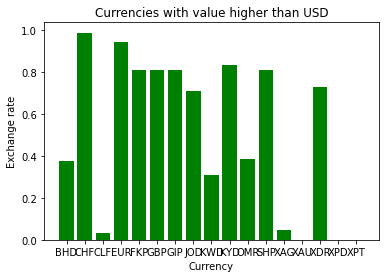

In [59]:
# Plot the forex rates using pyplot

import matplotlib.pyplot as plt

plt.bar(forexhigherThanUsd.Currency, forexhigherThanUsd.ExchangeRate, color='green')
plt.xlabel("Currency")
plt.ylabel("Exchange rate")
plt.title("Currencies with value higher than USD")

plt.show()